# 	Explication du fonctionnement de k-mean

Les données sont présentées dans le fichier iris.csv. Pour faciliter leur manipulation nous les stockons dans un objet pandas dataFrame.

In [3]:
# Ici nous importons les librairies utiles par la suite
#librairies de représentation graphiques
import matplotlib as mpl
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pylab import figure, subplot, hist, xlim, show, plot
%matplotlib inline

#librairies de manipulation de données et de fouille de données
import pandas as pd
import pylab as pl
import numpy as np

import copy


In [4]:
#Lecture des données et stockage dans l objet data_pd
data_pd = pd.read_csv('iris.csv')

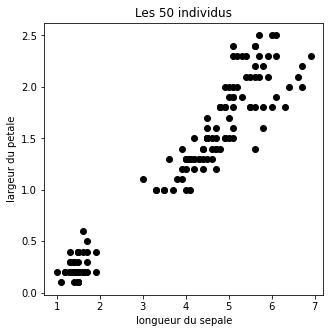

In [5]:
#visualisation
fig = plt.figure(figsize=(5, 5))
plt.scatter(data_pd[['longueur du petale']], data_pd[['largeur du petale']], color='k')
pl.xlabel('longueur du sepale')
pl.ylabel('largeur du petale')
pl.title('Les 50 individus')    
plt.show()

In [6]:
#détermination des couleurs pour les futures représentations
colors = np.where(data_pd['Espece']=='setosa','r','-')
colors[data_pd['Espece']=='versicolor'] = 'g'
colors[data_pd['Espece']=='virginica']= 'b'
color_dict={'setosa':'r','versicolor':'g' ,'virginica':'b'}

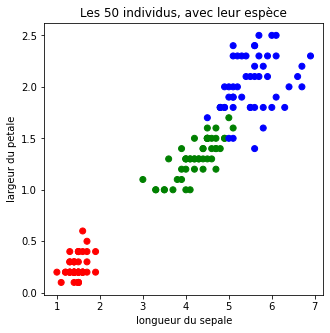

In [7]:
#visualisation
fig = plt.figure(figsize=(5, 5))
plt.scatter(data_pd[['longueur du petale']], data_pd[['largeur du petale']], color=colors)
pl.xlabel('longueur du sepale')
pl.ylabel('largeur du petale')
pl.title('Les 50 individus, avec leur espèce')    
plt.show()

In [8]:
data_pd.Espece=data_pd.Espece.astype('category')
data_pd['espece_encoded']=data_pd.Espece.cat.codes

Afin de garantir que les distances utilisées seront appropriées nous devons normaliser les attributs

In [9]:
#normalisation
Norm_pd=copy.deepcopy(data_pd)
Norm_pd[['longueur du sepale', 'largeur du sepale', 'longueur du petale',
       'largeur du petale']]=(data_pd[['longueur du sepale', 'largeur du sepale', 'longueur du petale',
       'largeur du petale']]-data_pd[['longueur du sepale', 'largeur du sepale', 'longueur du petale',
       'largeur du petale']].min())/(data_pd[['longueur du sepale', 'largeur du sepale', 'longueur du petale',
       'largeur du petale']].max()-data_pd[['longueur du sepale', 'largeur du sepale', 'longueur du petale',
       'largeur du petale']].min())

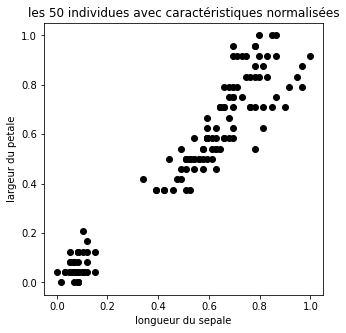

In [10]:
#visualisation
fig = plt.figure(figsize=(5, 5))
plt.scatter(Norm_pd[['longueur du petale']], Norm_pd[['largeur du petale']], color='k')
pl.xlabel('longueur du sepale')
pl.ylabel('largeur du petale')
pl.title('les 50 individues avec caractéristiques normalisées')    
plt.show()

## Clustering

Nous allons détailler le mode de fonctionnement de cet algorithme
L algorithme a besoin de centroïdes de départ que nous pouvons fixer aléatoirement ou pas.
### Initialisation aléatoire

Ici le nombre de groupes attendus est (3). Ils sont numérotés de 0 à 2.

In [11]:
np.random.seed(200)
k = 3
# centroids[i] = ['longueur du sepale', 'largeur du sepale', 'longueur du petale','largeur du petale'']
nb_caracteristique=4
centroids_r = np.random.random_sample((k, nb_caracteristique+1))
for i in range(k): centroids_r[i,0]=i
print(centroids_r) 


[[0.         0.22654742 0.59442014 0.42830868 0.76414069]
 [1.         0.35742368 0.90969489 0.45608099 0.98180271]
 [2.         0.98602751 0.92326671 0.30369331 0.84610349]]


### Intitialisation choisie

Vous pouvez également choisir des points comme centroïds initiaux par exemple


In [12]:
centroids=np.matrix('0  0 0 0 0; 1 0.5 0.5 0.5 0.5; 2 1 1 1 1')
print(centroids) 


[[0.  0.  0.  0.  0. ]
 [1.  0.5 0.5 0.5 0.5]
 [2.  1.  1.  1.  1. ]]


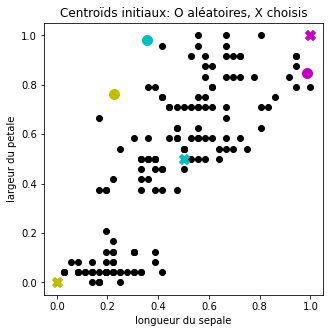

In [13]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(Norm_pd[['longueur du sepale']], Norm_pd[['largeur du petale']], color='k')
colmap = {0: 'y', 1: 'c', 2: 'm'}
for  i in range(k):
    plt.scatter(centroids[i,1], centroids[i,4],color=colmap[centroids[i,0]],marker='X',s=100)
    plt.scatter(centroids_r[i,1], centroids_r[i,4],color=colmap[centroids_r[i,0]],marker='o',s=100)
pl.xlabel('longueur du sepale')
pl.ylabel('largeur du petale')
pl.title('Centroïds initiaux: O aléatoires, X choisis')    
plt.show()

Pour la suite nous choisirons les centroïds initaux choisis

### Affectation
Une fois les centroïdes choisis, il faut affecter y les individus, en fonction de la distance des individus aux centroïds.
Chaque individu est affecté au centroïd le plus proche, la notion de distance est donc essentielle.

In [14]:
## Assignment Stage
for i in range(k):
    Norm_pd['distance_from_{}'.format(i)] = (
            np.sqrt(
                (Norm_pd['longueur du sepale'] - centroids[i,1]) ** 2
                + (Norm_pd['largeur du sepale'] - centroids[i,2]) ** 2
                + (Norm_pd['longueur du petale'] - centroids[i,3]) ** 2
                + (Norm_pd['largeur du petale'] - centroids[i,4]) ** 2
               
            )
        )
centroid_distance_cols = ['distance_from_{}'.format(i) for i  in range(k)]
    
Norm_pd['closest'] = Norm_pd.loc[:, centroid_distance_cols].idxmin(axis=1)
Norm_pd['closest'] = Norm_pd['closest'].map(lambda x: int(x.lstrip('distance_from_')))
Norm_pd['color'] = Norm_pd['closest'] 

colors_kmean = np.where(Norm_pd['color']==0,'y','-')
colors_kmean [Norm_pd['color']==1] = 'c'
colors_kmean [Norm_pd['color']==2]= 'm'
#Norm_pd['color'].value_counts()

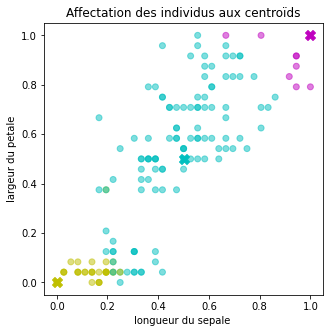

In [15]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(Norm_pd[['longueur du sepale']], Norm_pd[['largeur du petale']], color= colors_kmean, alpha=0.5)

for i in range(k):
    plt.scatter(centroids[i,1], centroids[i,4],color=colmap[centroids[i,0]],marker='X',s=100)
pl.xlabel('longueur du sepale ')
pl.ylabel('largeur du petale')
pl.title('Affectation des individus aux centroïds')  
plt.show()

### Mise à jour
A partir de l affection, on est capable de calculer les centres de gravité des clusters.
Ces centres de gravité deviennent les nouveaux centroïds.

In [16]:
## Update Stage

old_centroids =copy.deepcopy(centroids)
for i  in range(k):
    centroids[i,1] = np.mean(Norm_pd[Norm_pd['closest'] == i]['longueur du sepale'])
    centroids[i,2] = np.mean(Norm_pd[Norm_pd['closest'] == i]['largeur du sepale'])
    centroids[i,3] = np.mean(Norm_pd[Norm_pd['closest'] == i]['longueur du petale'])
    centroids[i,4] = np.mean(Norm_pd[Norm_pd['closest'] == i]['largeur du petale'])
print('Anciens centroïds')
print(old_centroids)
print('Nouveaux centroids')
print(centroids)



Anciens centroïds
[[0.  0.  0.  0.  0. ]
 [1.  0.5 0.5 0.5 0.5]
 [2.  1.  1.  1.  1. ]]
Nouveaux centroids
[[0.         0.13978495 0.48521505 0.08201203 0.05241935]
 [1.         0.47572573 0.4207958  0.54298366 0.53978979]
 [2.         0.89583333 0.515625   0.91525424 0.890625  ]]


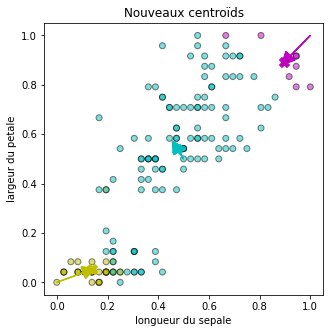

In [17]:
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(Norm_pd[['longueur du sepale']], Norm_pd[['largeur du petale']], color=colors_kmean, alpha=0.5, edgecolor='k')
for i in range(k):
    plt.scatter(centroids[i,1], centroids[i,4],color=colmap[centroids[i,0]],marker='X',s=100)

    for i in range(k):
          
        old_x = old_centroids[i,1]
        old_y = old_centroids[i,4]
  
        dx = (centroids[i,1] - old_centroids[i,1]) * 0.75
        dy = (centroids[i,4] - old_centroids[i,4]) * 0.75

        plt.arrow(old_x, old_y, dx, dy, head_width=0.05, head_length=0.05, fc=colmap[centroids[i,0]], ec=colmap[centroids[i,0]])
pl.xlabel('longueur du sepale')
pl.ylabel('largeur du petale')
pl.title('Nouveaux centroïds')  
plt.show()

Les étapes précedentes doivent être répétées jusqu'à convergence de l'algorithme, càd que les centroïds et les clusters n'évoluent plus. 
L'algorithme est déjà codé dans les bibliothèques python utilisées. Vous trouverez ci dessous la syntaxe à utiliser.

In [18]:
from sklearn import cluster
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(Norm_pd[['longueur du sepale', 'largeur du sepale', 'longueur du petale',
       'largeur du petale']] ) 
#K-means training
y_pred = k_means.predict(Norm_pd[['longueur du sepale', 'largeur du sepale', 'longueur du petale',
       'largeur du petale']])

#We store the K-means results in a dataframe
pred = pd.DataFrame(y_pred)
pred.columns = ['Prediction_kmean']

#we merge this dataframe with df
Norm_pd = pd.concat([Norm_pd,pred], axis = 1)
centroids = k_means.cluster_centers_
print('Coordonnées des 3 centroids')
print(centroids)

Coordonnées des 3 centroids
[[0.19611111 0.59083333 0.07864407 0.06      ]
 [0.66773504 0.44310897 0.7571708  0.78205128]
 [0.41203704 0.27690972 0.55896893 0.52083333]]


<Figure size 432x288 with 0 Axes>

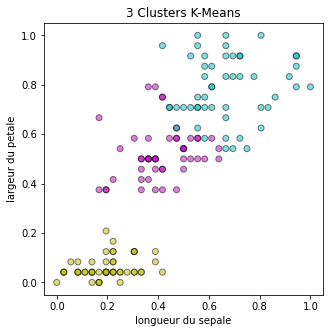

In [19]:
print
#Affichage du graphique
colors_kmean = np.where(Norm_pd ['Prediction_kmean']==0,'y','-')
colors_kmean [Norm_pd ['Prediction_kmean']==1] = 'c'
colors_kmean [Norm_pd ['Prediction_kmean']==2]= 'm'
#print(colmap[1])
pl.figure('3 Clusters K-Means')


fig = plt.figure(figsize=(5, 5))
plt.scatter(Norm_pd[['longueur du sepale']], Norm_pd[['largeur du petale']],  color=colors_kmean,alpha=0.5, edgecolor='k')
pl.xlabel('longueur du sepale')

pl.ylabel('largeur du petale')

pl.title('3 Clusters K-Means')

pl.show()

Nous pouvons maintenant comparer les vraies espèces aux clusters obtenus

<function matplotlib.pyplot.show(close=None, block=None)>

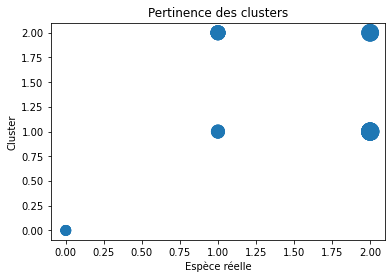

In [20]:
s=[2*n for n in range(len(Norm_pd['espece_encoded']))]
plt.scatter(Norm_pd['espece_encoded'],Norm_pd['Prediction_kmean'],s=s)
pl.xlabel('Espèce réelle')

pl.ylabel('Cluster')

pl.title('Pertinence des clusters')
show